#NYC Covid Infection Rate Plot
This colab notebook is just to create the NYC covid infection rate based on the New York Times state plot.

In [ ]:
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#All state, covid data
states = pd.read_csv("/content/drive/MyDrive/Data Science/ATDS Final Project/States.csv")

#Limit to New York
ny_covid = states.loc[states['state'] == 'New York']

#Limit to 3/2020 - 4/2021 (to match tweet data)
ny_covid = ny_covid[(ny_covid['date'] > '2020-02-28') & (ny_covid['date'] < '2021-05-01')]
ny_covid

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
23092,2021-04-26,New York,36,2032325,51511
23147,2021-04-27,New York,36,2035668,51587
23202,2021-04-28,New York,36,2038668,51608
23257,2021-04-29,New York,36,2042530,51677


In [ ]:
#Create column to count new cases rather than aggregated cases
ny_covid['new_cases'] = ny_covid['cases'].diff()
ny_covid.at[246, 'new_cases'] = 1.0
ny_covid['new_cases'] = ny_covid['new_cases'].astype(int)
ny_covid

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
...,...,...,...,...,...,...
23092,2021-04-26,New York,36,2032325,51511,3018
23147,2021-04-27,New York,36,2035668,51587,3343
23202,2021-04-28,New York,36,2038668,51608,3000
23257,2021-04-29,New York,36,2042530,51677,3862


In [ ]:
dates = ny_covid['date'].tolist()
first_day_month = []
for i in dates:
  if i[-2:] == '01':
    first_day_month.append(i)

first_day_month.append('2021-04-30')
first_day_month

['2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-04-30']

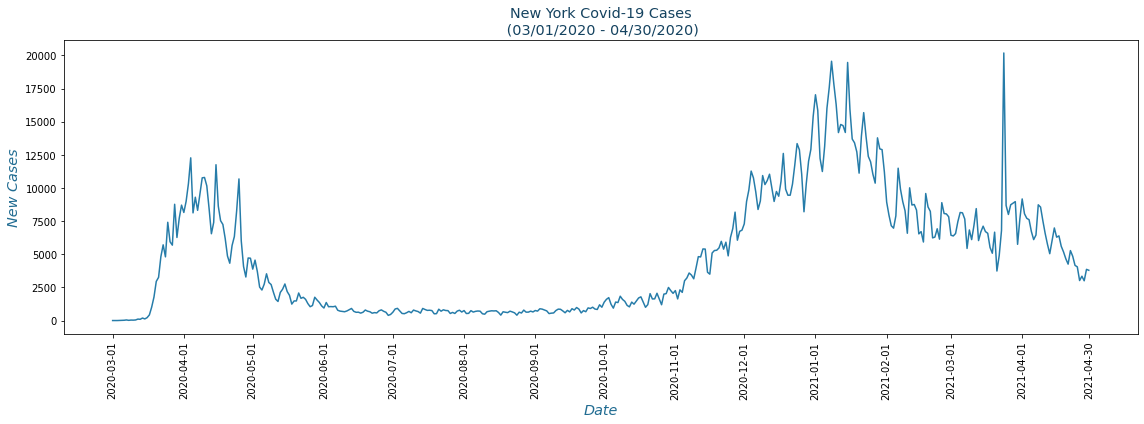

In [ ]:
fig, ax = plt.subplots()
ax.plot(ny_covid['date'], ny_covid['new_cases'], color = '#267CA9')
ax.tick_params(axis='x',rotation=90)
ax.set_xticks(first_day_month)
ax.set_xlabel('Date', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_ylabel('New Cases', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#216C92', fontstyle = 'oblique')
ax.set_title('New York Covid-19 Cases\n (03/01/2020 - 04/30/2020)', weight = 'book', fontfamily = 'sans_serif', fontsize = 'x-large', color = '#154360')
fig.set_size_inches(16, 6)
fig.tight_layout();
